# Assignment 9: Clustering

The objective:
Practicing unsupervised machine learning: clustering.
The tasks:
1. In Exercise 1 we used Hierarchical clustering algorithm.

• Which type?


In Exercise 1 we used Agglomerative(buttom-up), witch makes each data point a single point cluster, then it take two closest neighbouring clusters and make them as one cluster. after that it takes the three closest clusters and make them as one cluster. this is repeated until all points go in only one cluster.
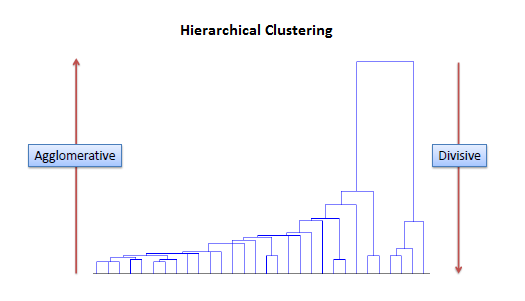


• How many types of hierarchical clustering are you familiar with?

we know of 2 hierarchical clustering algorithms.  
    
    Agglomerative (Buttom-up), and
    
    Divisive(top-down)

• How do they differ?

The easy answer is that one method takes the datapoint and makes clusters from top-down, and the other from buttom-up. As seen on the image above. 

Divisive clustering is more complex as compared to agglomerative clustering, as in the case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.

A divisive algorithm is more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone.

2. Train a clustering model with Mean Shift algorithm and freedom.csv data source
file.

• store your model in a file

• create simple web application that can deploy and run the model as seen in class

• run the application for predicting the cluster of a data set

• take and attach a screen shot of your solution


In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import  MeanShift, estimate_bandwidth

from sklearn import metrics
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist

import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph

In [2]:
data = pd.read_csv("./data/freedom.csv", delimiter=',')

In [3]:
dataDf = pd.DataFrame(data)
#data
dataDf.head(10)

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,2.5,2.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,Argentina,4.5,2.0,3.0,3.0,5.5,6.0,5.5,5.5,5.5,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,4.5,4.5,4.5,4.5,4.5,4.5,4.0
8,Australia,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Austria,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
data.mean()

C:\Users\filip\AppData\Local\Temp/ipykernel_2304/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


1972    4.299296
1973    4.318182
1974    4.320690
1975    4.396026
1976    4.413158
1977    4.380405
1978    4.317881
1979    4.227273
1980    4.261290
1981    4.251592
1982         NaN
1983    4.221519
1984    4.226415
1985    4.191824
1986    4.154088
1987    4.122642
1988    4.075472
1989    4.018750
1990    3.859375
1991    3.692737
1992    3.612022
1993    3.702128
1994    3.687831
1995    3.629630
1996    3.574074
1997    3.574074
1998    3.500000
1999    3.502632
2000    3.486842
2001    3.486842
2002    3.386842
2003    3.347368
2004    3.297368
2005    3.236842
2006    3.242188
2007    3.263021
2008    3.270833
2009    3.309896
2010    3.307292
2011    3.310881
2012    3.316062
2013    3.297927
2014    3.331606
2015    3.349741
2016    3.383420
2017    3.391192
2018    3.422280
dtype: float64

In [5]:
data.shape

(193, 48)

In [6]:
# Select attributes and convert to numpy
data1 = dataDf.fillna(dataDf.mean())

#X = data.iloc[:, 5:7].values
#filledData = data.fillna(X.mean())
#filledData.iloc[:, 5:7].values
X = data1.iloc[:, 5:7].values

C:\Users\filip\AppData\Local\Temp/ipykernel_2304/3322712239.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = dataDf.fillna(dataDf.mean())


In [7]:
# Bandwidth is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
bandwidth

0.9553772317250746

In [8]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)
labels = msmodel.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_


9

In [9]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[4.52212052, 4.48690756],
       [6.07857143, 5.94761905],
       [5.33333333, 5.17642065],
       [6.696875  , 6.696875  ],
       [1.13043478, 1.17391304],
       [2.02380952, 2.02380952],
       [3.54131579, 3.15      ],
       [2.75      , 4.28530405],
       [1.75      , 4.4402027 ]])

In [10]:
# Predict the cluster for all the samples
Y = msmodel.predict(X)
Y

array([1, 3, 1, 0, 3, 0, 1, 0, 4, 4, 0, 4, 2, 2, 4, 0, 4, 0, 3, 0, 2, 0,
       5, 0, 2, 3, 0, 3, 3, 1, 4, 1, 3, 3, 1, 3, 5, 0, 1, 1, 4, 2, 0, 1,
       6, 0, 4, 6, 0, 6, 2, 0, 7, 3, 0, 0, 2, 3, 5, 5, 4, 1, 5, 0, 0, 1,
       5, 6, 6, 3, 1, 6, 1, 0, 1, 4, 6, 2, 1, 3, 4, 5, 5, 5, 4, 1, 0, 2,
       0, 2, 0, 3, 0, 0, 0, 2, 1, 7, 0, 4, 2, 3, 6, 0, 3, 5, 0, 1, 5, 6,
       0, 0, 7, 3, 0, 0, 3, 1, 0, 5, 2, 4, 4, 2, 3, 0, 3, 0, 4, 1, 0, 0,
       1, 5, 2, 2, 2, 1, 5, 2, 3, 0, 1, 6, 8, 2, 1, 0, 0, 8, 2, 2, 0, 0,
       0, 3, 2, 2, 0, 6, 5, 0, 0, 0, 1, 5, 4, 4, 1, 0, 1, 1, 0, 3, 0, 5,
       2, 5, 0, 0, 3, 0, 2, 4, 4, 1, 0, 0, 4, 3, 1, 2, 2], dtype=int64)

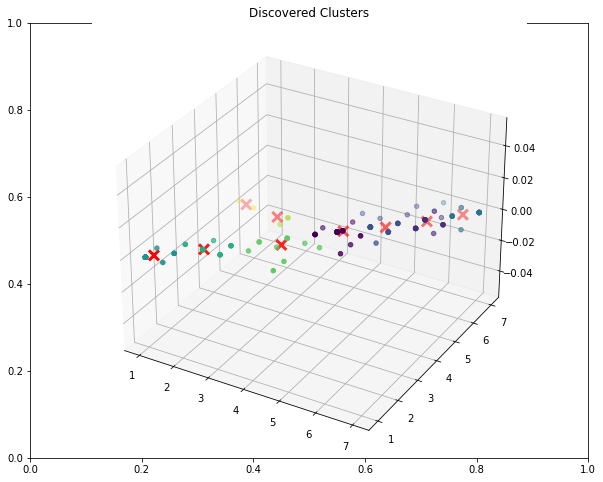

In [11]:
# Visualising the clusters
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
fig = plt.figure(figsize=(10,8))
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

In [12]:
!pip install joblib

In [13]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(msmodel, './deploy/msmodel.pkl')

['./deploy/msmodel.pkl']

In [14]:
#len(ms_model.pk1)

In [15]:
# For serialization and deserialization of data from/to file
# from sklearn.externals 
import joblib
msmodel = joblib.load('./deploy/msmodel.pkl')

In [16]:
# Test reading from the file
my_prediction = msmodel.predict([[137,  83]])
my_prediction

array([3], dtype=int64)

In [17]:
!pip install flask-bootstrap

In [18]:
!pip install wtforms

In [19]:
%%writefile mswebapp.py

# Import libraries
import numpy as np

# from sklearn.externals 
import joblib
import pickle
from flask import Flask, request, jsonify, render_template

# create an instance (our app)
app = Flask(__name__)
#app = Flask(__name__, template_folder='somefolder')

msmodel = joblib.load('.\deploy\msmodel.pkl')

@app.route('/', methods=['GET', 'POST'])

@app.route('/hi/<name>')
def hello(name = None):
    return render_template('start.html', name=name)
# name is parameter in the template: {{name}}

@app.route('/predict')
def predict():
    return render_template('prediction.html')

@app.route('/predicted', methods=['GET', 'POST'])
def predicted():
    if request.method == 'POST':
        x1 = request.form['x1']
        x2 = request.form['x2']
        X = [[x1, x2]]
        predicted = msmodel.predict(X)
          
        return render_template("predicted.html", content=X, prediction=predicted)
    
@app.route('/bye')
def bye():
    return render_template('bye.html')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting mswebapp.py


In [ ]:
!python mswebapp.py

In [ ]:
__init__.py